# Importing Libraries and Datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import warnings

warnings.filterwarnings("ignore")


def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    fxn()

In [3]:
# Load the dataset
df = pd.read_csv('kaggle/input/Dataset_2/LIMFADD.csv')

# Statistical Analysis

In [4]:
df.head()

,Followers,Following,Following/Followers,Posts,Posts/Followers,Bio,Profile Picture,External Link,Mutual Friends,Threads,Labels
0,2,2757,1378.5,0,0,N,N,N,0,N,Bot
1,2,505,252.5,0,0,N,Yes,N,0,N,Scam
2,6786,1782,0.262599469,1589,6051.040404,yes,N,Yes,10,N,Real
3,21,1281,61,0,0,N,Yes,N,0,N,Bot
4,585,1682,2.875213675,2663,926.1920333,yes,N,N,12,Yes,Real


In [5]:
df.tail()

,Followers,Following,Following/Followers,Posts,Posts/Followers,Bio,Profile Picture,External Link,Mutual Friends,Threads,Labels
14995,18400,918,0.049891304,1403,28121.1329,N,Yes,Yes,6,Yes,Real
14996,7,481,68.71428571,3,0.043659044,N,N,N,0,N,Scam
14997,6229,131,0.021030663,2418,114974.9771,N,N,Yes,13,N,Real
14998,18408,335,0.018198609,1226,67367.78507,yes,Yes,N,2,Yes,Real
14999,18245,2179,0.119429981,155,1297.831574,yes,N,Yes,2,N,Real


In [6]:
# Getting dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Followers            15000 non-null  int64 
 1   Following            15000 non-null  int64 
 2   Following/Followers  15000 non-null  object
 3   Posts                15000 non-null  int64 
 4   Posts/Followers      15000 non-null  object
 5   Bio                  15000 non-null  object
 6   Profile Picture      15000 non-null  object
 7   External Link        15000 non-null  object
 8   Mutual Friends       15000 non-null  int64 
 9   Threads              15000 non-null  object
 10  Labels               15000 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.3+ MB


In [7]:
# Get the statistical summary of the dataframe
df.describe()

,Followers,Following,Posts,Mutual Friends
count,15000.000000,15000.000000,15000.000000,15000.000000
mean,23397.378933,1385.350000,427.830200,3.011733
std,41920.419061,1600.823163,678.889037,4.203313
min,0.000000,0.000000,0.000000,0.000000
25%,6.000000,369.000000,1.000000,0.000000
50%,48.000000,725.500000,4.000000,0.000000
75%,19535.250000,1747.000000,578.250000,6.000000
max,163000.000000,6692.000000,2669.000000,15.000000


In [8]:
# Check for missing values
df.isnull().sum()

Followers              0
Following              0
Following/Followers    0
Posts                  0
Posts/Followers        0
Bio                    0
Profile Picture        0
External Link          0
Mutual Friends         0
Threads                0
Labels                 0
dtype: int64

In [9]:
# Check for duplicates
df.duplicated().sum()

np.int64(59)

In [10]:
# Get the number of unique values in the "Labels" column (Target column)
df['Labels'].value_counts()

Labels
Bot     3750
Scam    3750
Real    3750
Spam    3750
Name: count, dtype: int64

# Data Visualization

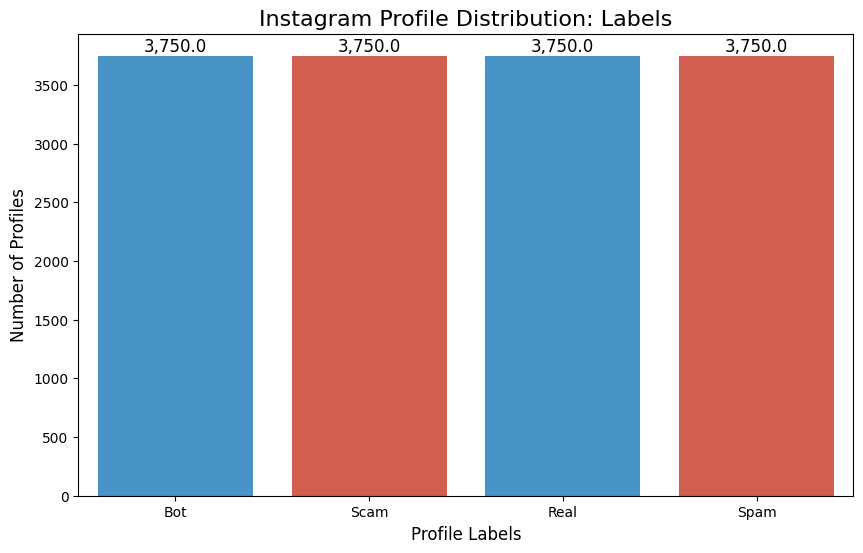

In [11]:
# Visualization of labels distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Labels', data=df, palette=['#3498db', '#e74c3c'])
plt.title('Instagram Profile Distribution: Labels', fontsize=16)
plt.xlabel('Profile Labels', fontsize=12)
plt.ylabel('Number of Profiles', fontsize=12)
# Add values on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom', fontsize=12)

plt.show()

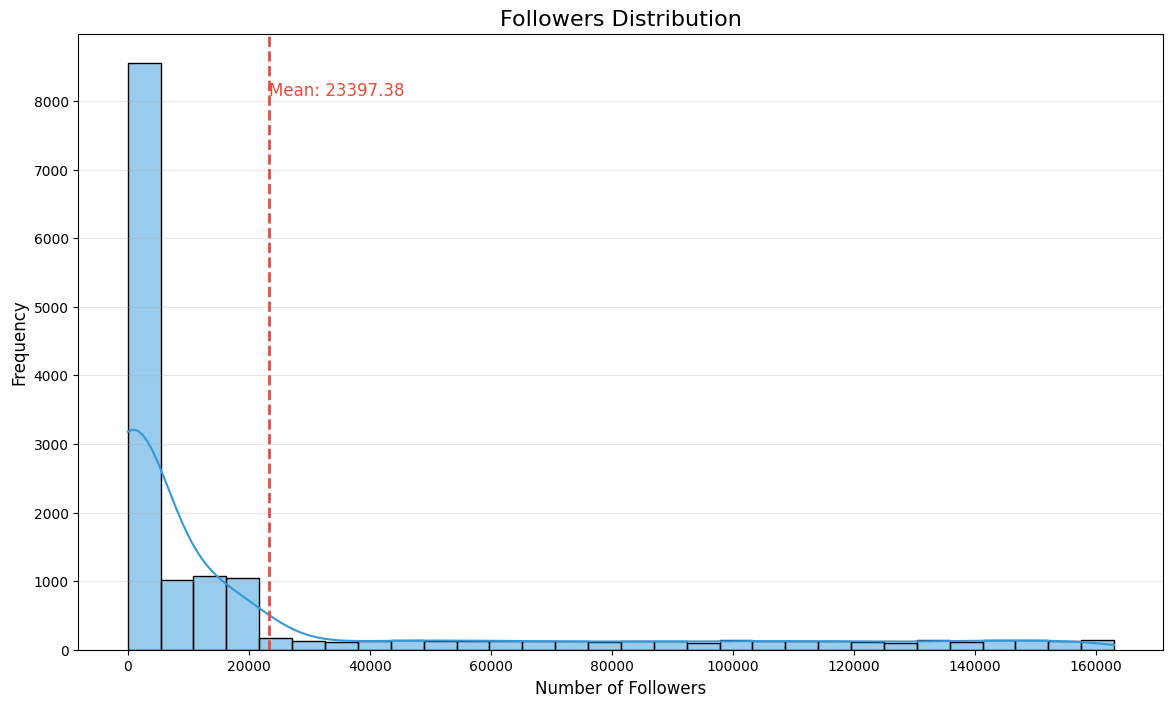

In [12]:
# Enhanced visualization of the followers distribution
plt.figure(figsize=(14, 8))
sns.histplot(df['Followers'], bins=30, kde=True, color='#3498db')
plt.title('Followers Distribution', fontsize=16)
plt.xlabel('Number of Followers', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Add a vertical line for the mean
mean_val = df['Followers'].mean()
plt.axvline(x=mean_val, color='#e74c3c', linestyle='--', linewidth=2)
plt.text(mean_val + 0.02, plt.ylim()[1]*0.9, f'Mean: {mean_val:.2f}', color='#e74c3c', fontsize=12)

plt.show()

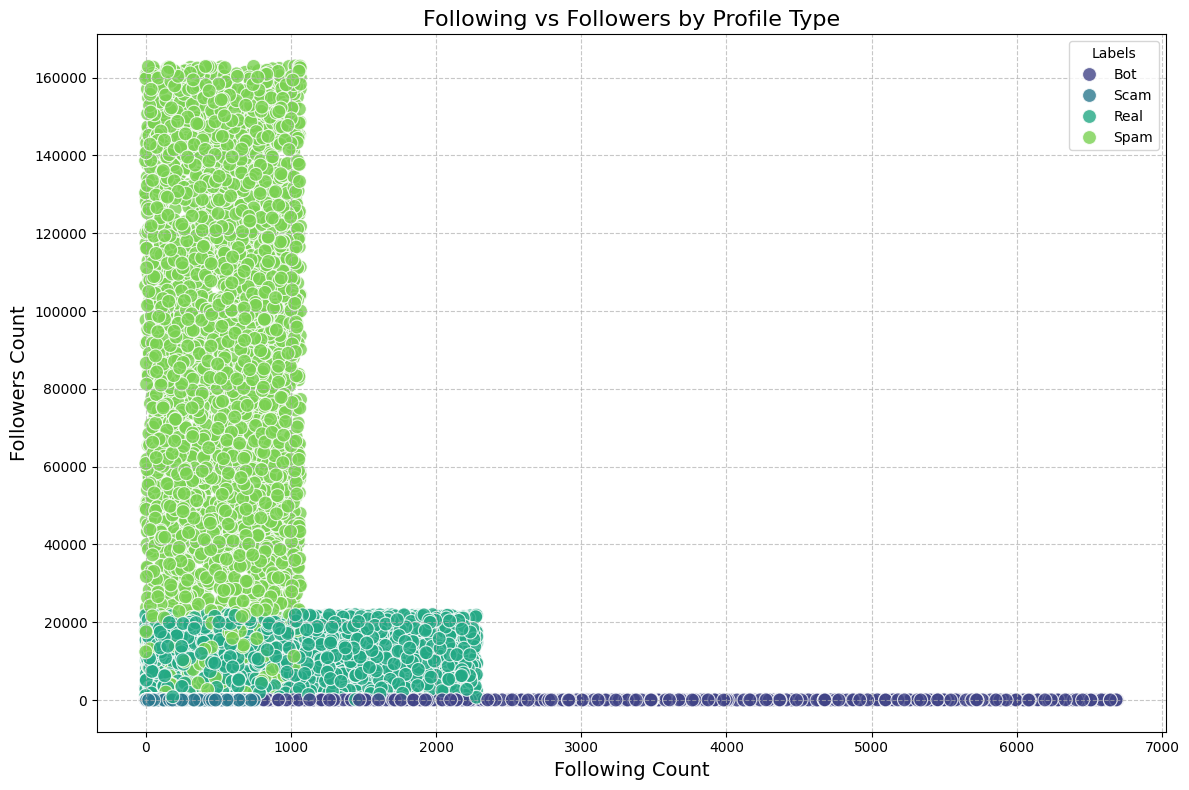

In [13]:
# Following vs Followers with Labels
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Following', y='Followers', hue='Labels', data=df, palette='viridis', alpha=0.8, s=100)
plt.title('Following vs Followers by Profile Type', fontsize=16)
plt.xlabel('Following Count', fontsize=14)
plt.ylabel('Followers Count', fontsize=14)
plt.legend(title='Labels')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

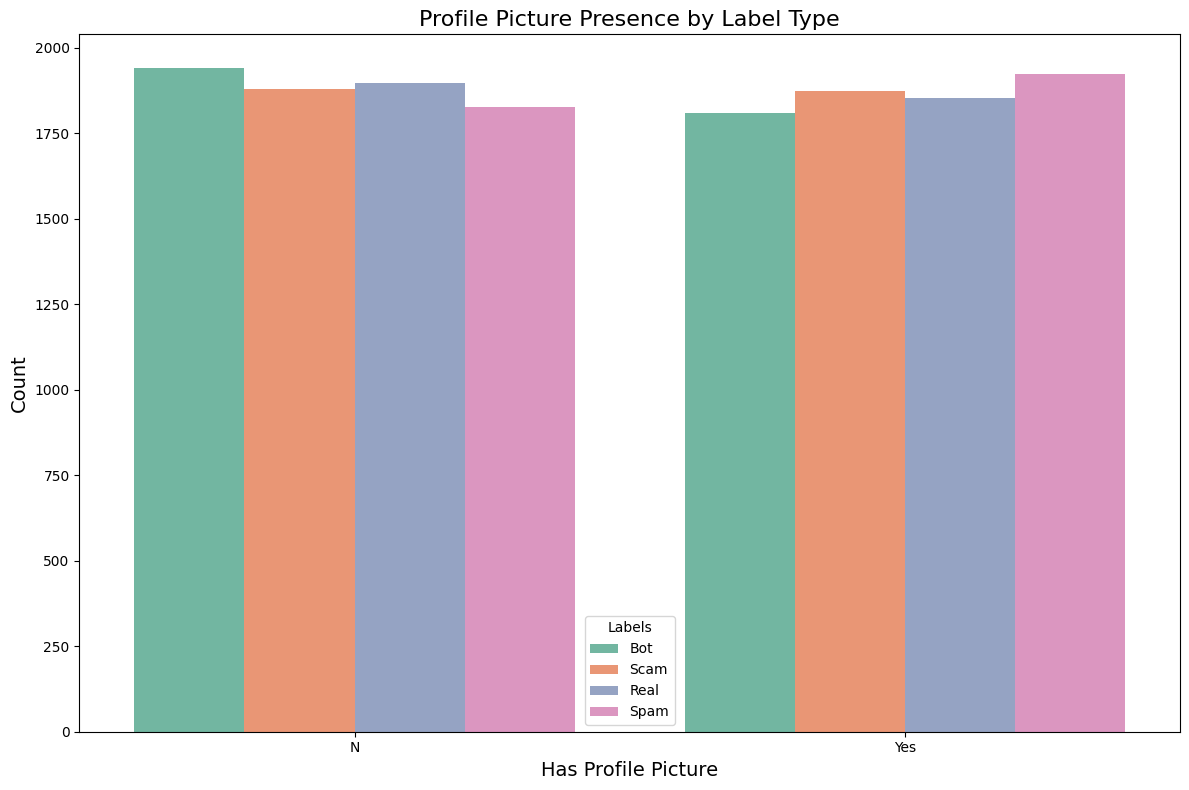

In [14]:
# Profile Picture vs Bio with Labels
plt.figure(figsize=(12, 8))
sns.countplot(x='Profile Picture', hue='Labels', data=df, palette='Set2')
plt.title('Profile Picture Presence by Label Type', fontsize=16)
plt.xlabel('Has Profile Picture', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Labels')
plt.tight_layout()
plt.show()

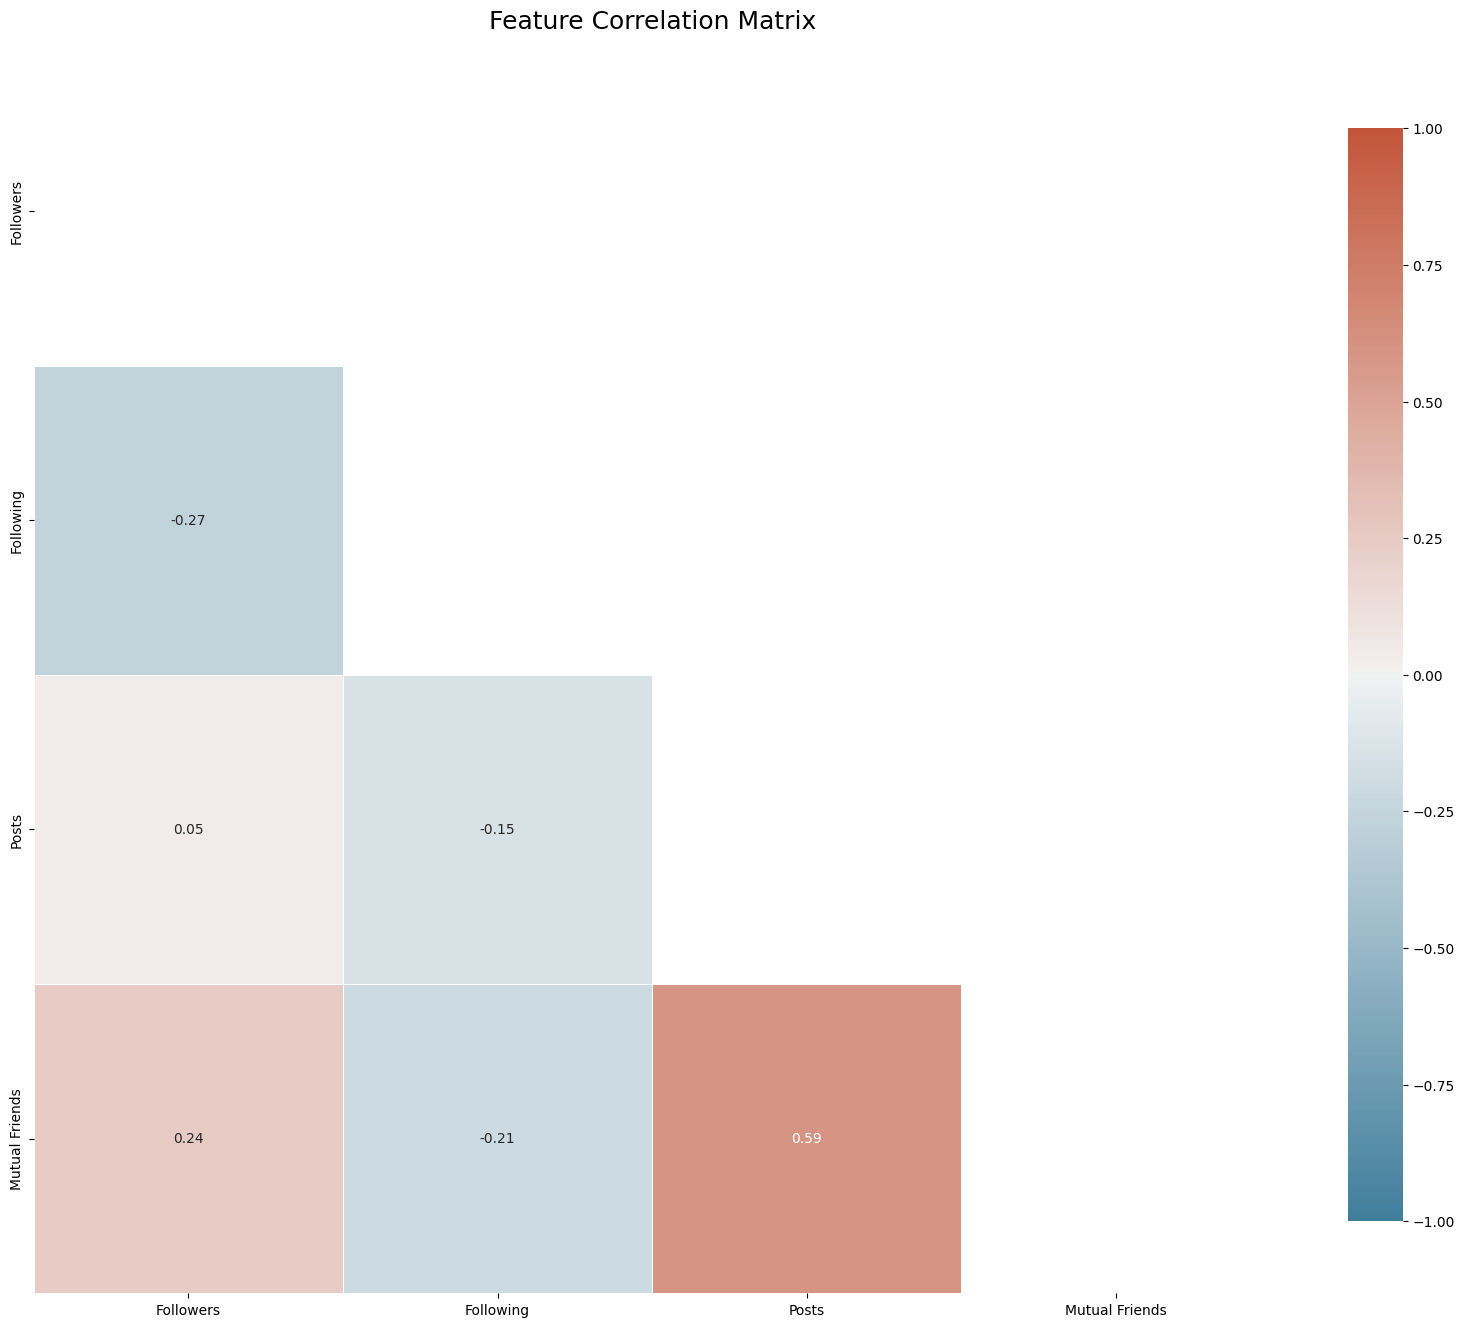

In [15]:
# Enhanced visualization of the correlation matrix
plt.figure(figsize=(16, 14))
mask = np.triu(df.corr(numeric_only=True))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f', cmap=cmap, linewidths=0.5, 
            mask=mask, vmin=-1, vmax=1, center=0, square=True, cbar_kws={"shrink": .8})

plt.title('Feature Correlation Matrix', fontsize=18, pad=20)
plt.tight_layout()
plt.show()

# Data Preprocessing

In [16]:
# Drop the derived features as they contain redundant information
df.drop(['Following/Followers', 'Posts/Followers'], axis=1, inplace=True)

In [17]:
# Label Encoding for categorical features
le = LabelEncoder()
categorical_cols = ['Bio', 'Profile Picture', 'External Link', 'Threads', 'Labels']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [18]:
# Prepare data for modeling
X = df.drop('Labels', axis=1)
y = df['Labels']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"X_train Shape: {X_train.shape}")
print(f"Y_train Shape: {y_train.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"Y_test Shape: {y_test.shape}")

X_train Shape: (10500, 8)
Y_train Shape: (10500,)
X_test Shape: (4500, 8)
Y_test Shape: (4500,)


In [19]:
# Scale the data before training the models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Neural Network Model

In [20]:
# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
X_test_tensor = torch.FloatTensor(X_test_scaled)

# Convert labels to one-hot encoding
unique_labels = np.unique(y_train)
label_map = {label: i for i, label in enumerate(unique_labels)}

y_train_indices = np.array([label_map[label] for label in y_train])
y_test_indices = np.array([label_map[label] for label in y_test])

y_train_tensor = torch.zeros(len(y_train), len(unique_labels))
y_train_tensor[range(len(y_train)), y_train_indices] = 1
y_test_tensor = torch.zeros(len(y_test), len(unique_labels))
y_test_tensor[range(len(y_test)), y_test_indices] = 1

In [21]:
# Create PyTorch datasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

In [22]:
# Create dataloaders
batch_size = 32
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [23]:
# PyTorch model definition
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim=X_train_scaled.shape[1], num_classes=len(np.unique(y_train))):
        super(NeuralNetwork, self).__init__()
        self.layer1 = nn.Linear(input_dim, 64)
        self.layer2 = nn.Linear(64, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, num_classes)
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.dropout(x)
        x = self.relu(self.layer2(x))
        x = self.dropout(x)
        x = self.relu(self.layer3(x))
        x = self.dropout(x)
        x = self.softmax(self.layer4(x))
        return x

In [24]:
# Create the model
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (layer1): Linear(in_features=8, out_features=64, bias=True)
  (layer2): Linear(in_features=64, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=64, bias=True)
  (layer4): Linear(in_features=64, out_features=4, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.3, inplace=False)
  (softmax): Softmax(dim=1)
)


In [25]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [26]:
# Training the model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 50
history = {'train_loss': [], 'val_loss': []}

In [27]:
# Validation split
val_size = int(0.1 * len(train_dataset))
train_size = len(train_dataset) - val_size
train_subset, val_subset = torch.utils.data.random_split(train_dataset, [train_size, val_size])
train_loader = DataLoader(dataset=train_subset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(dataset=val_subset, batch_size=batch_size, shuffle=False)

In [28]:
for epoch in range(num_epochs):
    # Training
    model.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    epoch_loss = running_loss / len(train_loader)
    history['train_loss'].append(epoch_loss)
    
    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    
    val_loss = val_loss / len(val_loader)
    history['val_loss'].append(val_loss)
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Val Loss: {val_loss:.4f}')

Epoch [1/50], Train Loss: 0.9171, Val Loss: 0.8017
Epoch [2/50], Train Loss: 0.8112, Val Loss: 0.7962
Epoch [3/50], Train Loss: 0.8055, Val Loss: 0.7920
Epoch [4/50], Train Loss: 0.8021, Val Loss: 0.7906
Epoch [5/50], Train Loss: 0.7997, Val Loss: 0.7891
Epoch [6/50], Train Loss: 0.7983, Val Loss: 0.7870
Epoch [7/50], Train Loss: 0.7963, Val Loss: 0.8004
Epoch [8/50], Train Loss: 0.7992, Val Loss: 0.7882
Epoch [9/50], Train Loss: 0.7931, Val Loss: 0.7896
Epoch [10/50], Train Loss: 0.7925, Val Loss: 0.7866
Epoch [11/50], Train Loss: 0.7941, Val Loss: 0.7866
Epoch [12/50], Train Loss: 0.7929, Val Loss: 0.7869
Epoch [13/50], Train Loss: 0.7933, Val Loss: 0.7859
Epoch [14/50], Train Loss: 0.7911, Val Loss: 0.7872
Epoch [15/50], Train Loss: 0.7914, Val Loss: 0.7862
Epoch [16/50], Train Loss: 0.7900, Val Loss: 0.7850
Epoch [17/50], Train Loss: 0.7920, Val Loss: 0.7859
Epoch [18/50], Train Loss: 0.7904, Val Loss: 0.7849
Epoch [19/50], Train Loss: 0.7900, Val Loss: 0.7853
Epoch [20/50], Train 

# Neural Network Model Validation and Results

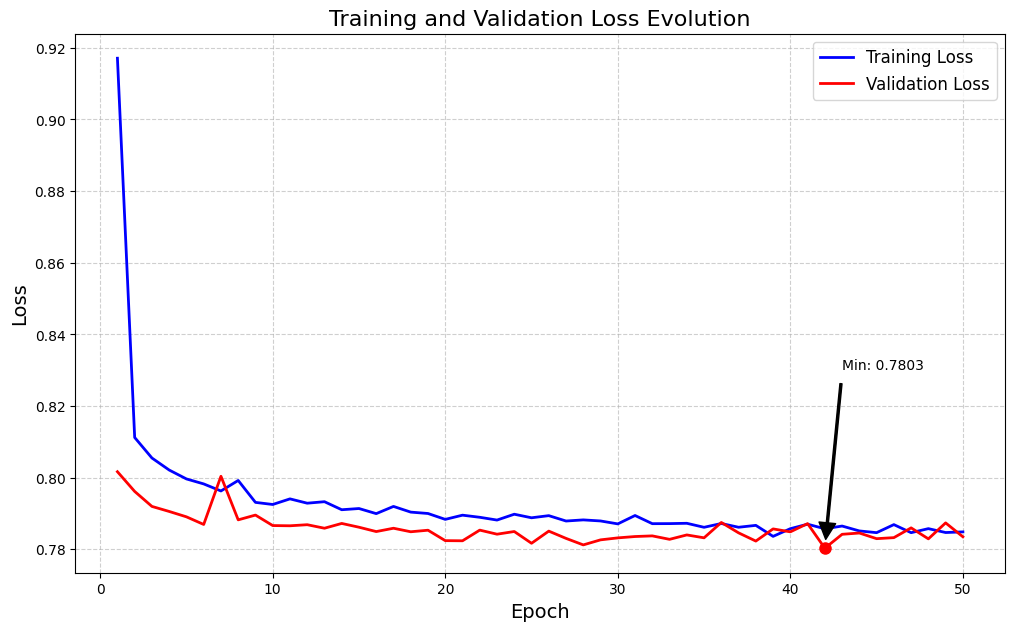

In [29]:
# Enhanced visualization of loss progression
plt.figure(figsize=(12, 7))
epochs = range(1, len(history['train_loss']) + 1)

plt.plot(epochs, history['train_loss'], 'b-', linewidth=2, label='Training Loss')
plt.plot(epochs, history['val_loss'], 'r-', linewidth=2, label='Validation Loss')

plt.title('Training and Validation Loss Evolution', fontsize=16)
plt.ylabel('Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)

min_val_loss = min(history['val_loss'])
min_val_epoch = history['val_loss'].index(min_val_loss) + 1
plt.plot(min_val_epoch, min_val_loss, 'ro', markersize=8)
plt.annotate(f'Min: {min_val_loss:.4f}', 
             xy=(min_val_epoch, min_val_loss),
             xytext=(min_val_epoch+1, min_val_loss+0.05),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
             fontsize=10)

plt.show()

In [30]:
# Prediction on test set
model.eval()
nn_predicted = []
test_targets = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, predicted_batch = torch.max(outputs, 1)
        _, labels_batch = torch.max(labels, 1)
        
        nn_predicted.extend(predicted_batch.cpu().numpy())
        test_targets.extend(labels_batch.numpy())

In [31]:
# Model evaluation
print("Neural Network Results:")
print(classification_report(test_targets, nn_predicted))

Neural Network Results:
              precision    recall  f1-score   support

           0       1.00      0.90      0.95      1143
           1       0.98      0.96      0.97      1156
           2       0.91      1.00      0.95      1112
           3       0.95      0.98      0.97      1089

    accuracy                           0.96      4500
   macro avg       0.96      0.96      0.96      4500
weighted avg       0.96      0.96      0.96      4500



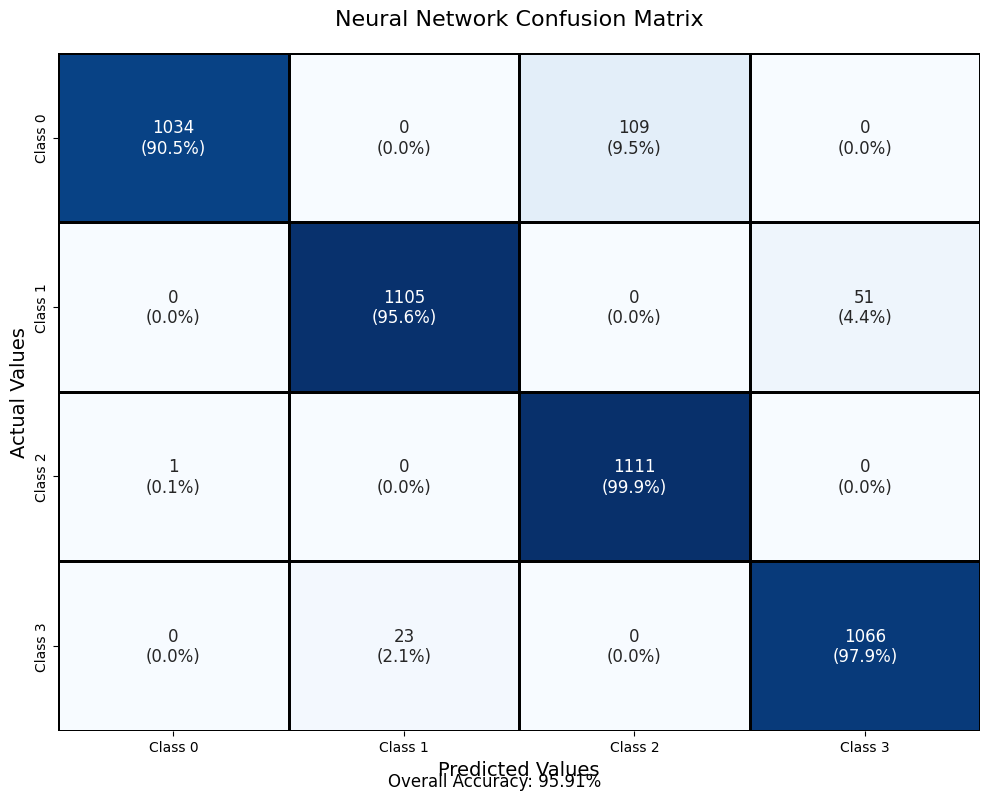

In [32]:
# Enhanced confusion matrix visualization
plt.figure(figsize=(10, 8))
cm = confusion_matrix(test_targets, nn_predicted)
num_classes = len(np.unique(test_targets))
labels = [f'Class {i}' for i in range(num_classes)]

# Calculate percentages for display
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Define custom annotations
annot = np.empty_like(cm).astype(str)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        annot[i, j] = f'{cm[i, j]}\n({cm_percent[i, j]:.1f}%)'

ax = sns.heatmap(cm, annot=annot, fmt='', cmap='Blues', linewidths=1, linecolor='black',
                 xticklabels=labels, yticklabels=labels, cbar=False, annot_kws={"size": 12})

plt.title('Neural Network Confusion Matrix', fontsize=16, pad=20)
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Actual Values', fontsize=14)
plt.tight_layout()

# Add global accuracy
accuracy = np.trace(cm) / np.sum(cm) * 100
plt.figtext(0.5, 0.01, f'Overall Accuracy: {accuracy:.2f}%', ha='center', fontsize=12)

plt.show()

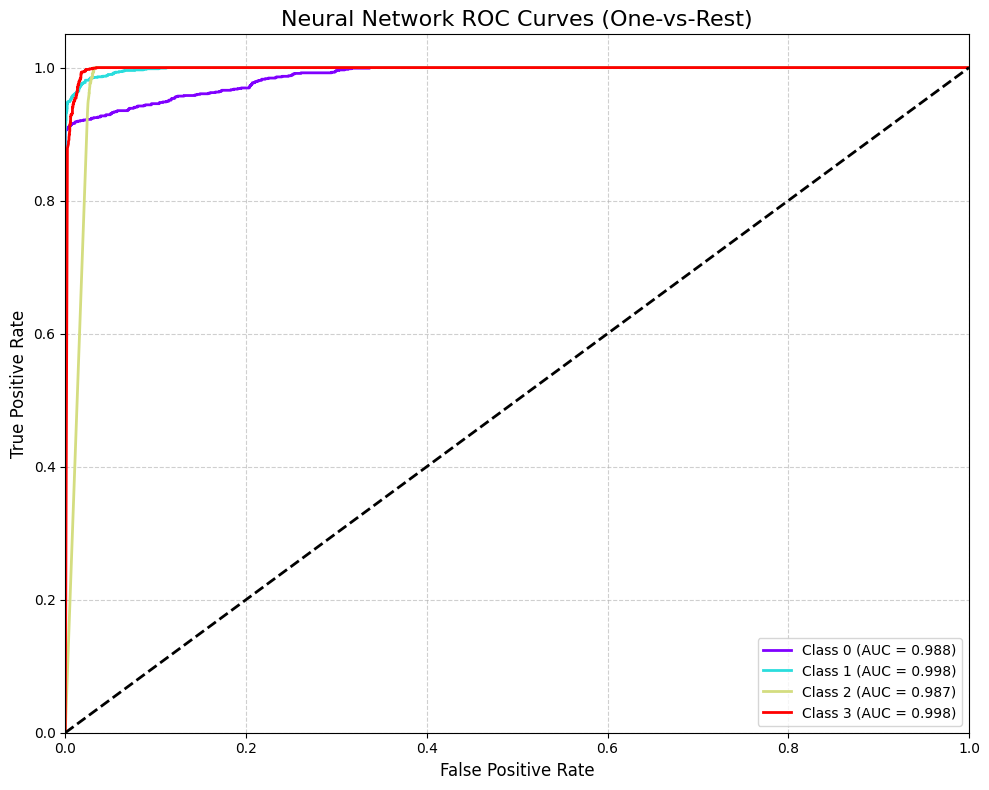

In [33]:
# ROC curve visualization for multiclass using one-vs-rest approach
model.eval()
nn_y_true = []
nn_y_pred_proba = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        
        _, labels_batch = torch.max(labels, 1)
        nn_y_true.extend(labels_batch.numpy())
        nn_y_pred_proba.extend(outputs.cpu().numpy())

nn_y_pred_proba = np.array(nn_y_pred_proba)
nn_y_true = np.array(nn_y_true)

# Plot ROC curves for each class (one-vs-rest)
plt.figure(figsize=(10, 8))
num_classes = len(np.unique(nn_y_true))
colors = plt.cm.rainbow(np.linspace(0, 1, num_classes))

for i, color in zip(range(num_classes), colors):
    # For each class, calculate ROC curve (one-vs-rest)
    nn_fpr, nn_tpr, _ = roc_curve((nn_y_true == i).astype(int), nn_y_pred_proba[:, i])
    nn_roc_auc = metrics.auc(nn_fpr, nn_tpr)
    plt.plot(nn_fpr, nn_tpr, color=color, lw=2,
             label=f'Class {i} (AUC = {nn_roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Neural Network ROC Curves (One-vs-Rest)', fontsize=16)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# XGBoost Model

In [34]:
# Train XGBoost model
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softprob',
    num_class=len(np.unique(y_train)),
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# Create a validation set for XGBoost
X_train_xgb, X_val_xgb, y_train_xgb, y_val_xgb = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42
)

# Train the model with early stopping
eval_set = [(X_val_xgb, y_val_xgb)]
xgb_model.fit(
    X_train_xgb, 
    y_train_xgb,
    eval_set=eval_set,
    verbose=True,
)

[0]	validation_0-mlogloss:1.20783
[1]	validation_0-mlogloss:1.06753
[2]	validation_0-mlogloss:0.96502
[3]	validation_0-mlogloss:0.86304
[4]	validation_0-mlogloss:0.77227
[5]	validation_0-mlogloss:0.69623
[6]	validation_0-mlogloss:0.62853
[7]	validation_0-mlogloss:0.56976
[8]	validation_0-mlogloss:0.51698
[9]	validation_0-mlogloss:0.47233
[10]	validation_0-mlogloss:0.43208
[11]	validation_0-mlogloss:0.39509
[12]	validation_0-mlogloss:0.36342
[13]	validation_0-mlogloss:0.33403
[14]	validation_0-mlogloss:0.30740
[15]	validation_0-mlogloss:0.28422
[16]	validation_0-mlogloss:0.26164
[17]	validation_0-mlogloss:0.24028
[18]	validation_0-mlogloss:0.22254
[19]	validation_0-mlogloss:0.20630
[20]	validation_0-mlogloss:0.19155
[21]	validation_0-mlogloss:0.17902
[22]	validation_0-mlogloss:0.16729
[23]	validation_0-mlogloss:0.15692
[24]	validation_0-mlogloss:0.14678
[25]	validation_0-mlogloss:0.13757
[26]	validation_0-mlogloss:0.12868
[27]	validation_0-mlogloss:0.12123
[28]	validation_0-mlogloss:0.1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=4, ...)

# XGBoost Model Validation and Results

In [35]:
# Get XGBoost predictions
xgb_predicted = xgb_model.predict(X_test)
xgb_predicted_proba = xgb_model.predict_proba(X_test)

In [36]:
# Model evaluation
print("XGBoost Results:")
print(classification_report(y_test, xgb_predicted))

XGBoost Results:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1143
           1       0.99      0.96      0.97      1156
           2       0.98      1.00      0.99      1112
           3       0.95      0.99      0.97      1089

    accuracy                           0.98      4500
   macro avg       0.98      0.98      0.98      4500
weighted avg       0.98      0.98      0.98      4500



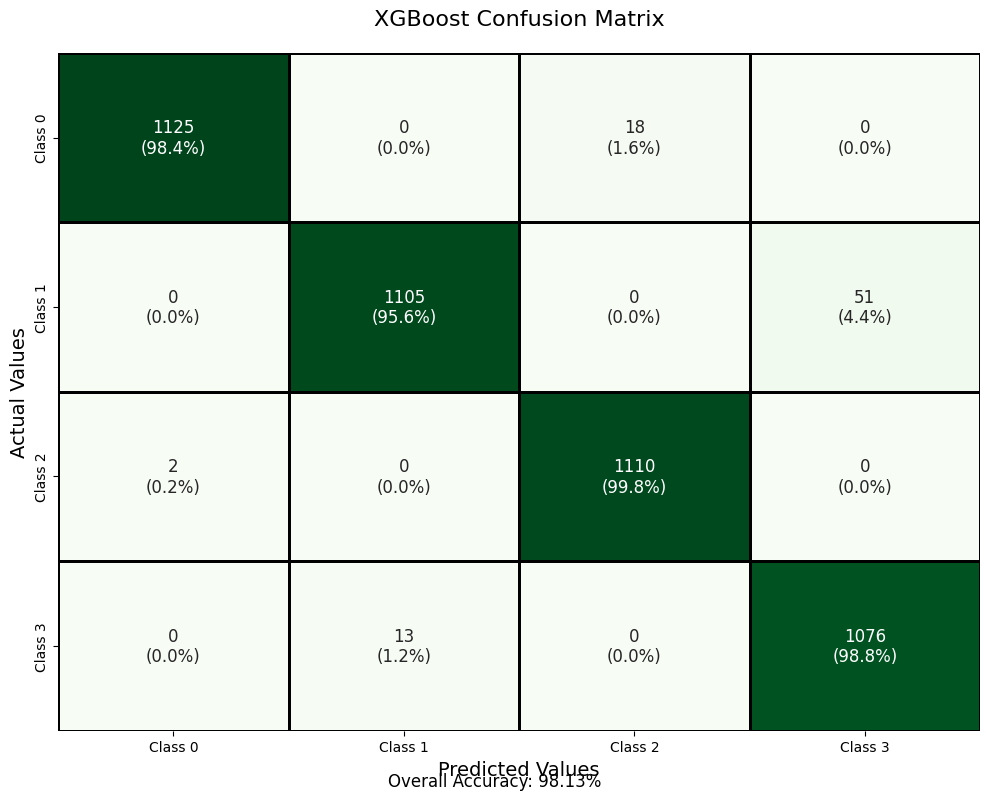

In [37]:
# XGBoost confusion matrix
plt.figure(figsize=(10, 8))
cm_xgb = confusion_matrix(y_test, xgb_predicted)
labels = [f'Class {i}' for i in range(num_classes)]

# Calculate percentages for display
cm_percent_xgb = cm_xgb.astype('float') / cm_xgb.sum(axis=1)[:, np.newaxis] * 100

# Define custom annotations
annot_xgb = np.empty_like(cm_xgb).astype(str)
for i in range(cm_xgb.shape[0]):
    for j in range(cm_xgb.shape[1]):
        annot_xgb[i, j] = f'{cm_xgb[i, j]}\n({cm_percent_xgb[i, j]:.1f}%)'

ax = sns.heatmap(cm_xgb, annot=annot_xgb, fmt='', cmap='Greens', linewidths=1, linecolor='black',
                 xticklabels=labels, yticklabels=labels, cbar=False, annot_kws={"size": 12})

plt.title('XGBoost Confusion Matrix', fontsize=16, pad=20)
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Actual Values', fontsize=14)
plt.tight_layout()

# Add global accuracy
accuracy_xgb = np.trace(cm_xgb) / np.sum(cm_xgb) * 100
plt.figtext(0.5, 0.01, f'Overall Accuracy: {accuracy_xgb:.2f}%', ha='center', fontsize=12)

plt.show()

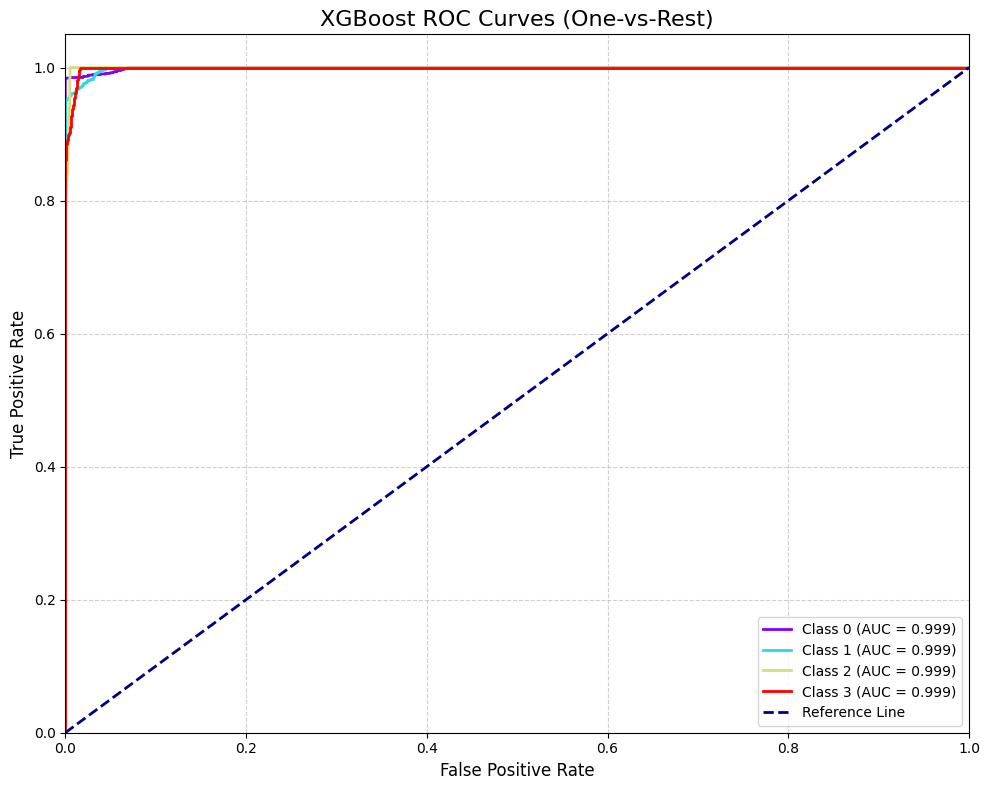

In [38]:
# XGBoost ROC curves for multiclass
plt.figure(figsize=(10, 8))

for i, color in zip(range(num_classes), colors):
    # For each class, calculate ROC curve (one-vs-rest)
    xgb_fpr, xgb_tpr, _ = roc_curve((y_test == i).astype(int), xgb_predicted_proba[:, i])
    xgb_roc_auc = metrics.auc(xgb_fpr, xgb_tpr)
    plt.plot(xgb_fpr, xgb_tpr, color=color, lw=2, 
             label=f'Class {i} (AUC = {xgb_roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'navy', lw=2, linestyle='--', label='Reference Line')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('XGBoost ROC Curves (One-vs-Rest)', fontsize=16)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

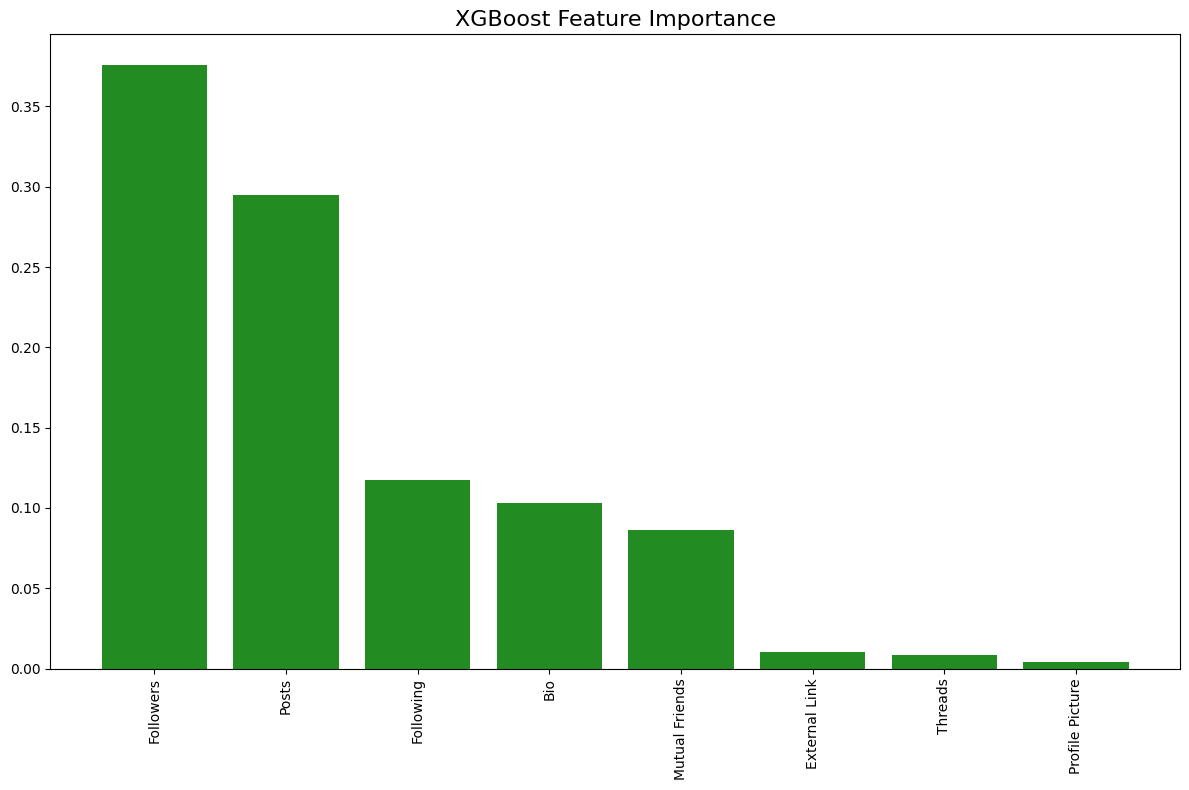

In [39]:
# Feature importance visualization for XGBoost
plt.figure(figsize=(12, 8))
feature_names = X.columns
xgb_importance = xgb_model.feature_importances_
indices = np.argsort(xgb_importance)[::-1]

plt.title('XGBoost Feature Importance', fontsize=16)
plt.bar(range(len(xgb_importance)), xgb_importance[indices], color='forestgreen', align='center')
plt.xticks(range(len(xgb_importance)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

# Model Comparison

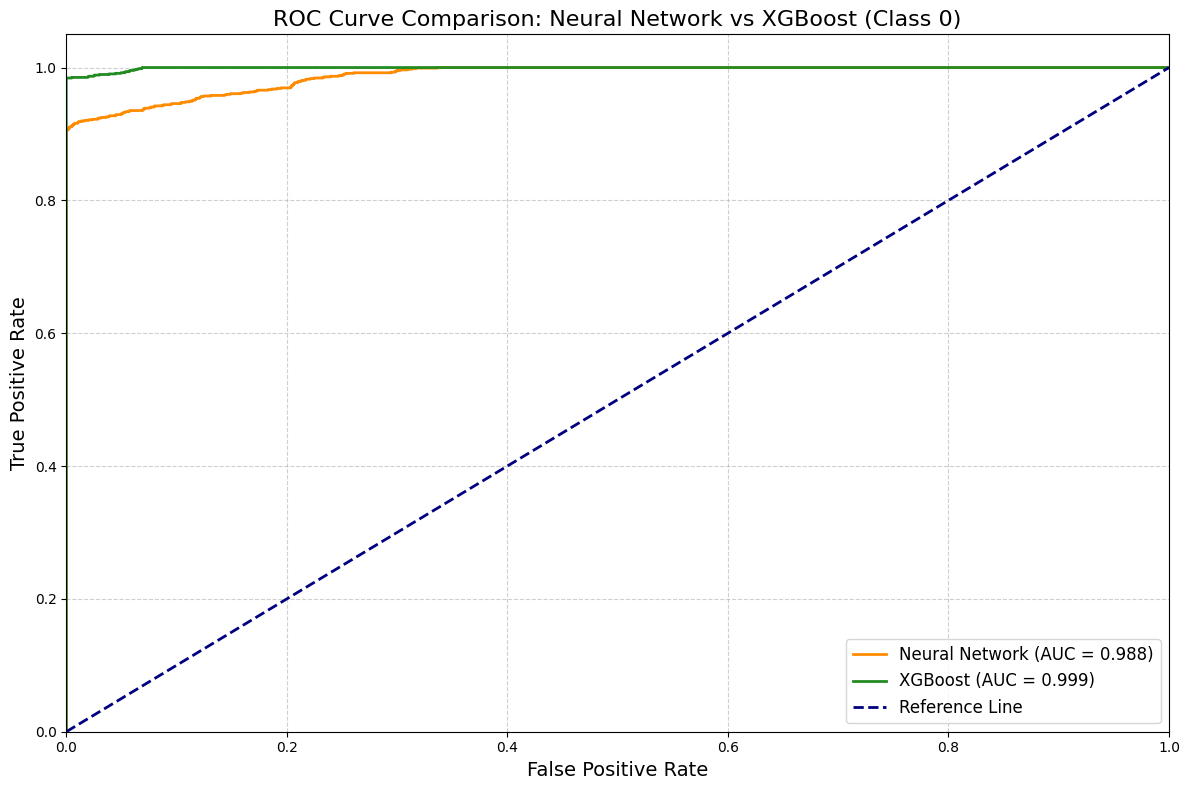

In [40]:
# Compare ROC curves of both models
plt.figure(figsize=(12, 8))

# Plot Neural Network ROC for the first class (as an example)
nn_fpr, nn_tpr, _ = roc_curve((nn_y_true == 0).astype(int), nn_y_pred_proba[:, 0])
nn_roc_auc = metrics.auc(nn_fpr, nn_tpr)
plt.plot(nn_fpr, nn_tpr, 'darkorange', lw=2, label=f'Neural Network (AUC = {nn_roc_auc:.3f})')

# Plot XGBoost ROC for the first class
xgb_fpr, xgb_tpr, _ = roc_curve((y_test == 0).astype(int), xgb_predicted_proba[:, 0])
xgb_roc_auc = metrics.auc(xgb_fpr, xgb_tpr)
plt.plot(xgb_fpr, xgb_tpr, 'forestgreen', lw=2, label=f'XGBoost (AUC = {xgb_roc_auc:.3f})')

plt.plot([0, 1], [0, 1], 'navy', lw=2, linestyle='--', label='Reference Line')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve Comparison: Neural Network vs XGBoost (Class 0)', fontsize=16)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

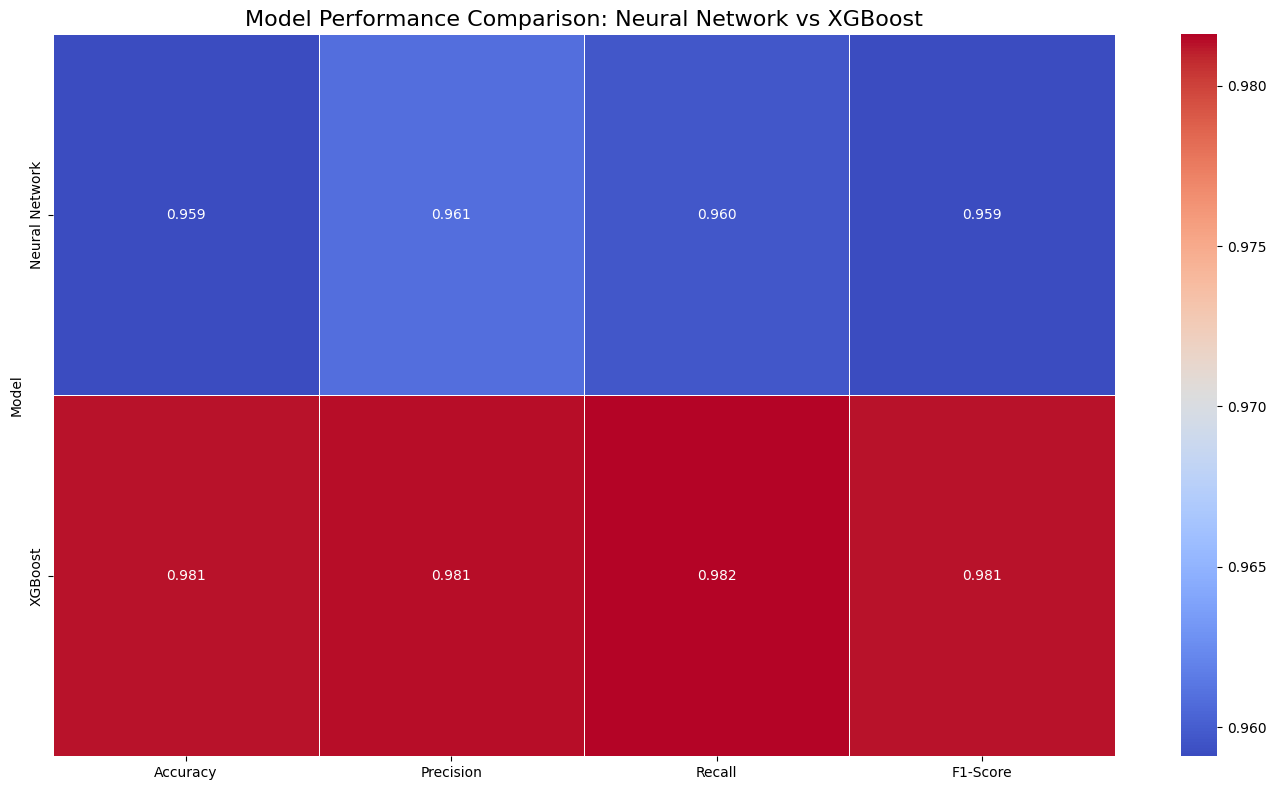

In [41]:
# Calculate average metrics across classes
nn_precision = metrics.precision_score(test_targets, nn_predicted, average='macro')
nn_recall = metrics.recall_score(test_targets, nn_predicted, average='macro')
nn_f1 = metrics.f1_score(test_targets, nn_predicted, average='macro')
nn_accuracy = accuracy_score(test_targets, nn_predicted)

xgb_precision = metrics.precision_score(y_test, xgb_predicted, average='macro')
xgb_recall = metrics.recall_score(y_test, xgb_predicted, average='macro')
xgb_f1 = metrics.f1_score(y_test, xgb_predicted, average='macro')
xgb_accuracy = accuracy_score(y_test, xgb_predicted)

# Compare accuracy, precision, recall, and F1-score for both models
metrics_comparison = pd.DataFrame({
    'Model': ['Neural Network', 'XGBoost'],
    'Accuracy': [nn_accuracy, xgb_accuracy],
    'Precision': [nn_precision, xgb_precision],
    'Recall': [nn_recall, xgb_recall],
    'F1-Score': [nn_f1, xgb_f1],
})

metrics_comparison.set_index('Model', inplace=True)

plt.figure(figsize=(14, 8))
ax = sns.heatmap(metrics_comparison, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5)
plt.title('Model Performance Comparison: Neural Network vs XGBoost', fontsize=16)
plt.tight_layout()
plt.show()

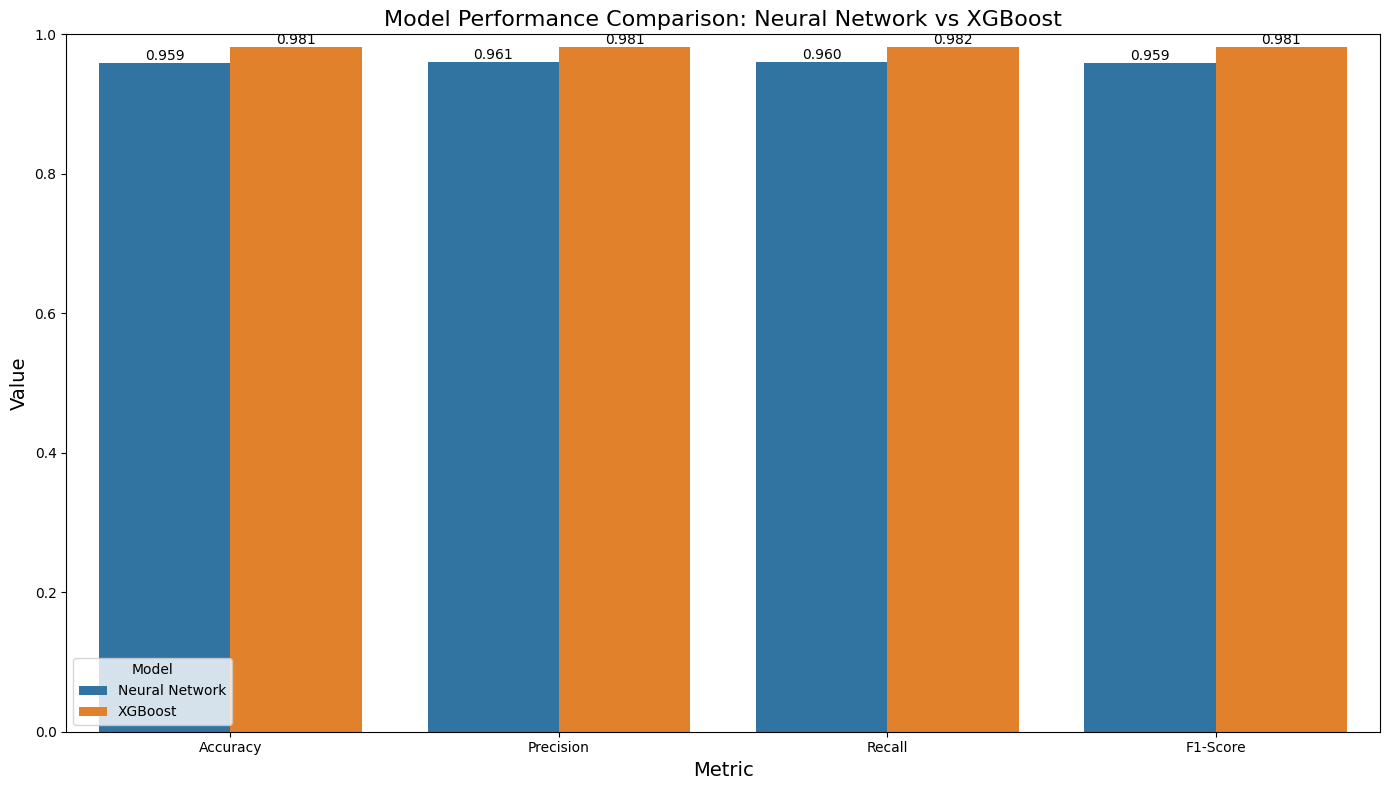

In [ ]:
# Bar chart comparison of key metrics
metrics_df_melted = pd.melt(metrics_comparison.reset_index(), id_vars=['Model'])

plt.figure(figsize=(14, 8))
ax = sns.barplot(x='variable', y='value', hue='Model', data=metrics_df_melted)
plt.title('Model Performance Comparison: Neural Network vs XGBoost', fontsize=16)
plt.xlabel('Metric', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend(title='Model')
plt.ylim(0, 1.0)

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', fontsize=10)

plt.tight_layout()
plt.show()